In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# years = [str(i) for i in range(2000, 2021)]
# html = []
# for year in years:
#     html.append(pd.read_html('https://www.basketball-reference.com/leagues/NBA_' + year +'_per_game.html', header=0))

In [3]:
# #Assigning dataframe to html table and dropping redundant headers and 'Rank' column
# for table in range(len(html)):
#     html[table][0].drop(html[table][0][html[table][0].Age == 'Age'].index, inplace=True)
#     html[table][0].drop('Rk', axis=1, inplace=True)
#     html[table][0]['Year'] = 2000 + table
#     #filling na values with 0
#     html[table][0].fillna(0, inplace=True)

In [4]:
# #checking if null values were successfully replaced
# df2020 = html[20][0]
# df2020.isnull().sum()

In [5]:
# #Creating 1 large dataframe from all tables
# frames = []
# for i in range(len(years)):
#     frames.append(html[i][0])
#     final = pd.concat(frames)

In [6]:
# #finding HOF players based on presence of *
# final['HOF'] = final['Player'].str.contains('\*')
# #Removing * from players
# final['Player'] = final['Player'].map(lambda x: x.rstrip('*'))


In [7]:
# #creating array of hof players that have played in 2000-2020
# hof = pd.unique(final['Player'][final['HOF'] == True])
# hof

In [8]:
# #dtypes of df immediately extracted from html are all objects
# df2020.dtypes

In [9]:
# #setting index paramater to false since index will be reassigned during df creation
# final.to_csv('NBA2000to2020stats.csv', index=False)

In [10]:
#saving to a csv then reload the df changes the data types to their preferred value
df = pd.read_csv('NBA2000to2020stats.csv')

In [11]:
#pd.set_option('display.max_rows', None)
pd.set_option('precision', 2)
#group by player and year
players = df.groupby(['Player', 'Year']).mean()

In [12]:
players.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,...,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00,9838.00
mean,26.63,50.85,24.94,20.29,3.05,6.83,0.43,0.58,1.67,0.24,...,0.70,0.94,2.62,3.56,1.80,0.64,0.41,1.17,1.84,8.16
std,4.33,25.29,28.72,9.93,2.17,4.60,0.10,0.69,1.81,0.18,...,0.20,0.81,1.79,2.47,1.78,0.44,0.47,0.79,0.80,5.95
min,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,30.00,1.00,12.10,1.40,3.20,0.40,0.00,0.10,0.00,...,0.64,0.37,1.30,1.80,0.60,0.30,0.10,0.60,1.30,3.60
50%,26.00,56.00,10.00,19.60,2.50,5.70,0.44,0.30,1.10,0.30,...,0.75,0.70,2.27,3.00,1.20,0.60,0.30,1.00,1.83,6.70
75%,30.00,74.00,49.00,28.40,4.30,9.50,0.48,1.00,2.80,0.36,...,0.81,1.30,3.50,4.70,2.40,0.90,0.50,1.60,2.40,11.50
max,44.00,82.00,82.00,43.70,12.20,27.80,1.00,5.10,13.20,1.00,...,1.00,5.50,11.50,16.30,11.70,2.90,3.70,5.70,6.00,36.10


In [13]:
#looking at the unmodified df
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,HOF
0,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,0.42,...,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000,False
1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,0.43,...,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000,False
2,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,0.39,...,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000,False
3,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,15.6,0.47,...,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,2000,False
4,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,3.4,0.29,...,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,2000,False


In [14]:
players.select_dtypes(include=['number'])

Age     G     GS    MP    FG  FGA   FG%   3P  3PA   3P%  \
Player         Year                                                             
A.C. Green     2000  36.0  82.0  82.00  23.5  2.10  4.7  0.45  0.0  0.0  0.25   
               2001  37.0  82.0   1.00  17.2  1.80  4.0  0.44  0.0  0.1  0.00   
A.J. Bramlett  2000  23.0   8.0   0.00   7.6  0.50  2.6  0.19  0.0  0.0  0.00   
A.J. Guyton    2001  22.0  33.0   8.00  19.1  2.40  5.8  0.41  0.8  2.1  0.39   
               2002  23.0  45.0   6.00  13.5  2.00  5.4  0.36  1.0  2.7  0.37   
...                   ...   ...    ...   ...   ...  ...   ...  ...  ...   ...   
Željko Rebrača 2002  29.0  74.0   4.00  15.9  2.60  5.1  0.51  0.0  0.0  0.00   
               2003  30.0  30.0  12.00  16.3  2.70  4.8  0.55  0.0  0.0  0.00   
               2004  31.0  16.0   1.33  13.0  2.13  4.5  0.46  0.0  0.0  0.00   
               2005  32.0  58.0   2.00  16.0  2.30  4.0  0.57  0.0  0.0  0.00   
               2006  33.0  29.0   2.00  14.2  1.80  3.3  0.54  0.0  0.0  0.00   

                     ...   FT%   ORB   DRB   TRB  AST   STL   BLK   TOV   PF  \
Player         Year  ...                                                       
A.C. Green     2000  ...  0.69  2.00  4.00  5.90  1.0  0.60  0.20  0.60  1.5   
               2001  ...  0.71  1.30  2.50  3.80  0.5  0.40  0.10  0.50  1.5   
A.J. Bramlett  2000  ...  0.00  1.50  1.30  2.80  0.0  0.10  0.00  0.40  1.6   
A.J. Guyton    2001  ...  0.83  0.30  0.80  1.10  1.9  0.30  0.20  0.70  1.1   
               2002  ...  0.81  0.30  0.70  1.00  1.8  0.20  0.20  0.80  0.5   
...                  ...   ...   ...   ...   ...  ...   ...   ...   ...  ...   
Željko Rebrača 2002  ...  0.77  1.10  2.80  3.90  0.5  0.40  1.00  1.10  2.6   
               2003  ...  0.79  0.90  2.20  3.10  0.3  0.20  0.60  1.00  2.6   
               2004  ...  0.68  1.07  1.53  2.57  0.4  0.13  0.53  0.87  2.2   
               2005  ...  0.86  0.80  2.30  3.20  0.4  0.20  0.70  0.80  2.2   
               2006  ...  0.76  0.40  1.80  2.20  0.3  0.20  0.70  0.80  2.0   

                      PTS  
Player         Year        
A.C. Green     2000  5.00  
               2001  4.50  
A.J. Bramlett  2000  1.00  
A.J. Guyton    2001  6.00  
               2002  5.40  
...                   ...  
Željko Rebrača 2002  6.90  
               2003  6.60  
               2004  5.07  
               2005  5.80  
               2006  4.70  

[9838 rows x 26 columns]

In [15]:
players.select_dtypes(include=['object', 'bool'])

HOF
Player         Year       
A.C. Green     2000  False
               2001  False
A.J. Bramlett  2000  False
A.J. Guyton    2001  False
               2002  False
...                    ...
Željko Rebrača 2002  False
               2003  False
               2004  False
               2005  False
               2006  False

[9838 rows x 1 columns]

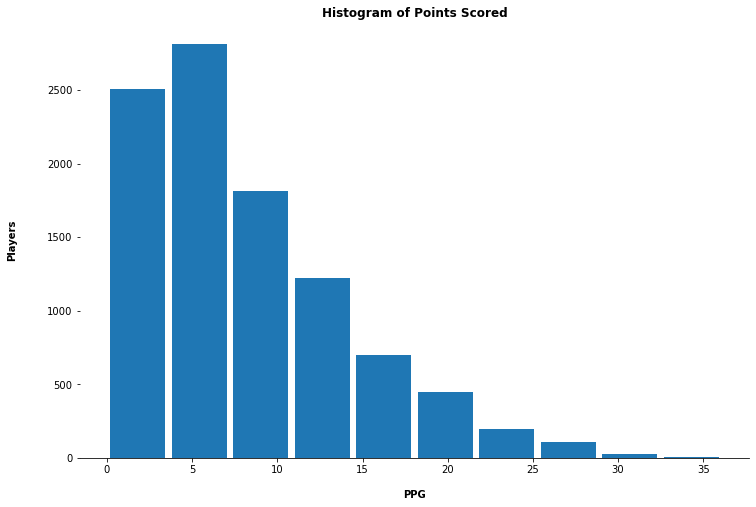

In [16]:
g = players.hist(column='PTS', grid=False, figsize=(12,8), rwidth=0.9)
g = g[0]
for i in g:
    # Despine
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)
    
    i.set_title('Histogram of Points Scored', weight='bold')
    i.set_xlabel('PPG', labelpad=15, weight='bold')
    i.set_ylabel('Players', labelpad=30, weight='bold')

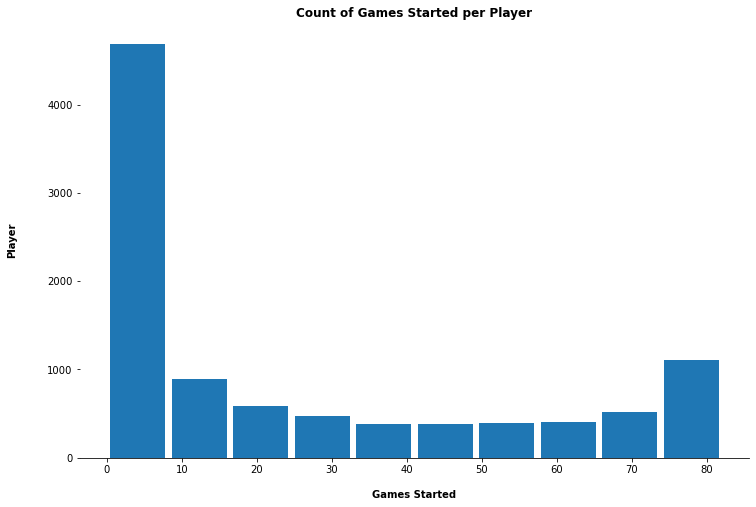

In [17]:
g = players.hist(column='GS', figsize=(12,8), rwidth=0.9, grid=False)
g = g[0]
for i in g:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)
    
    i.set_title('Count of Games Started per Player', weight='bold')
    i.set_xlabel('Games Started', weight='bold', labelpad=15)
    i.set_ylabel('Player', weight='bold', labelpad=30)

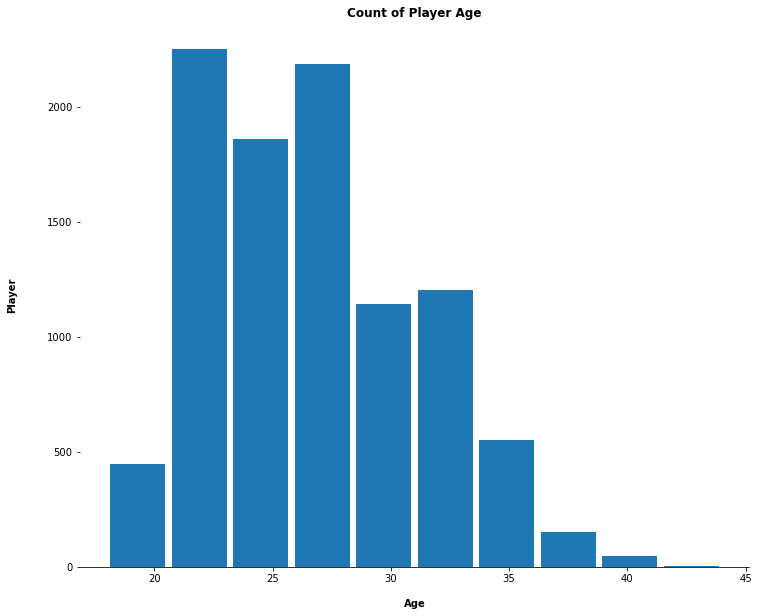

In [18]:
#histogram showing the ages of players over the last 20 seasons
ages = [int(x) for x in players.Age.unique()].sort()
g = players.hist(column='Age', figsize=(12,10), rwidth=0.9, grid=False)
g = g[0]
for i in g:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)
    
    i.set_title('Count of Player Age', weight='bold')
    i.set_xlabel('Age', weight='bold', labelpad=15)
    i.set_ylabel('Player', weight='bold', labelpad=30)

In [19]:
players.Age

Player          Year
A.C. Green      2000    36.0
                2001    37.0
A.J. Bramlett   2000    23.0
A.J. Guyton     2001    22.0
                2002    23.0
                        ... 
Željko Rebrača  2002    29.0
                2003    30.0
                2004    31.0
                2005    32.0
                2006    33.0
Name: Age, Length: 9838, dtype: float64

In [20]:
#Finding the player with the highest average points per game in the last 20 seasons
topplayer = players[players['PTS'] == players['PTS'].max()]

In [21]:
#Name, position and games played of player with highest PPG
topplayer

,,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF
Player,Year,,,,,,,,,,,,,,,,,,,,,
James Harden,2019,29.0,78.0,78.0,36.8,10.8,24.5,0.44,4.8,13.2,0.37,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,False


In [22]:
#Players who averaged more than 30 PPG
players[players['PTS'] > 30]

Age     G    GS    MP    FG   FGA   FG%   3P   3PA  \
Player            Year                                                        
Allen Iverson     2001  25.0  71.0  71.0  42.0  10.7  25.5  0.42  1.4   4.3   
                  2002  26.0  60.0  59.0  43.7  11.1  27.8  0.40  1.3   4.5   
                  2005  29.0  75.0  75.0  42.3  10.3  24.2  0.42  1.4   4.5   
                  2006  30.0  72.0  72.0  43.1  11.3  25.3  0.45  1.0   3.1   
Bradley Beal      2020  26.0  57.0  57.0  36.0  10.4  22.9  0.46  3.0   8.4   
Dwyane Wade       2009  27.0  79.0  79.0  38.6  10.8  22.0  0.49  1.1   3.5   
James Harden      2018  28.0  72.0  72.0  35.4   9.0  20.1  0.45  3.7  10.0   
                  2019  29.0  78.0  78.0  36.8  10.8  24.5  0.44  4.8  13.2   
                  2020  30.0  68.0  68.0  36.5   9.9  22.3  0.44  4.4  12.4   
Kevin Durant      2010  21.0  82.0  82.0  39.5   9.7  20.3  0.48  1.6   4.3   
                  2014  25.0  81.0  81.0  38.5  10.5  20.8  0.50  2.4   6.1   
Kobe Bryant       2006  27.0  80.0  80.0  41.0  12.2  27.2  0.45  2.3   6.5   
                  2007  28.0  77.0  77.0  40.8  10.6  22.8  0.46  1.8   5.2   
LeBron James      2006  21.0  79.0  79.0  42.5  11.1  23.1  0.48  1.6   4.8   
Russell Westbrook 2017  28.0  81.0  81.0  34.6  10.2  24.0  0.42  2.5   7.2   
Stephen Curry     2016  27.0  79.0  79.0  34.2  10.2  20.2  0.50  5.1  11.2   
Tracy McGrady     2003  23.0  75.0  74.0  39.4  11.1  24.2  0.46  2.3   6.0   

                         3P%  ...  ORB  DRB   TRB   AST  STL  BLK  TOV   PF  \
Player            Year        ...                                             
Allen Iverson     2001  0.32  ...  0.7  3.1   3.8   4.6  2.5  0.3  3.3  2.1   
                  2002  0.29  ...  0.7  3.8   4.5   5.5  2.8  0.2  4.0  1.7   
                  2005  0.31  ...  0.7  3.3   4.0   7.9  2.4  0.1  4.6  1.9   
                  2006  0.32  ...  0.6  2.6   3.2   7.4  1.9  0.1  3.4  1.7   
Bradley Beal      2020  0.35  ...  0.9  3.3   4.2   6.1  1.2  0.4  3.4  2.2   
Dwyane Wade       2009  0.32  ...  1.1  3.9   5.0   7.5  2.2  1.3  3.4  2.3   
James Harden      2018  0.37  ...  0.6  4.8   5.4   8.8  1.8  0.7  4.4  2.3   
                  2019  0.37  ...  0.8  5.8   6.6   7.5  2.0  0.7  5.0  3.1   
                  2020  0.35  ...  1.0  5.5   6.6   7.5  1.8  0.9  4.5  3.3   
Kevin Durant      2010  0.36  ...  1.3  6.3   7.6   2.8  1.4  1.0  3.3  2.1   
                  2014  0.39  ...  0.7  6.7   7.4   5.5  1.3  0.7  3.5  2.1   
Kobe Bryant       2006  0.35  ...  0.9  4.4   5.3   4.5  1.8  0.4  3.1  2.9   
                  2007  0.34  ...  1.0  4.7   5.7   5.4  1.4  0.5  3.3  2.7   
LeBron James      2006  0.34  ...  0.9  6.1   7.0   6.6  1.6  0.8  3.3  2.3   
Russell Westbrook 2017  0.34  ...  1.7  9.0  10.7  10.4  1.6  0.4  5.4  2.3   
Stephen Curry     2016  0.45  ...  0.9  4.6   5.4   6.7  2.1  0.2  3.3  2.0   
Tracy McGrady     2003  0.39  ...  1.6  4.9   6.5   5.5  1.7  0.8  2.6  2.1   

                         PTS    HOF  
Player            Year               
Allen Iverson     2001  31.1   True  
                  2002  31.4   True  
                  2005  30.7   True  
                  2006  33.0   True  
Bradley Beal      2020  30.5  False  
Dwyane Wade       2009  30.2  False  
James Harden      2018  30.4  False  
                  2019  36.1  False  
                  2020  34.3  False  
Kevin Durant      2010  30.1  False  
                  2014  32.0  False  
Kobe Bryant       2006  35.4   True  
                  2007  31.6   True  
LeBron James      2006  31.4  False  
Russell Westbrook 2017  31.6  False  
Stephen Curry     2016  30.1  False  
Tracy McGrady     2003  32.1   True  

[17 rows x 27 columns]

In [23]:
#Player with highest 3PT made
players[players['3P'] == players['3P'].max()]

Age     G    GS    MP    FG   FGA   FG%   3P   3PA   3P%  \
Player        Year                                                              
Stephen Curry 2016  27.0  79.0  79.0  34.2  10.2  20.2  0.50  5.1  11.2  0.45   
              2019  30.0  69.0  69.0  33.8   9.2  19.4  0.47  5.1  11.7  0.44   

                    ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS    HOF  
Player        Year  ...                                                       
Stephen Curry 2016  ...  0.9  4.6  5.4  6.7  2.1  0.2  3.3  2.0  30.1  False  
              2019  ...  0.7  4.7  5.3  5.2  1.3  0.4  2.8  2.4  27.3  False  

[2 rows x 27 columns]

In [24]:
#Player with highest assists
players[(players['AST'] == players['AST'].max()) & (players['G'] > 50)]

Age     G    GS    MP   FG   FGA   FG%   3P  3PA   3P%  \
Player      Year                                                            
Rajon Rondo 2012  25.0  53.0  53.0  36.9  4.8  10.8  0.45  0.2  0.8  0.24   
            2016  29.0  72.0  72.0  35.2  4.9  10.9  0.45  0.9  2.4  0.36   

                  ...  ORB  DRB  TRB   AST  STL  BLK  TOV   PF   PTS    HOF  
Player      Year  ...                                                        
Rajon Rondo 2012  ...  1.2  3.7  4.8  11.7  1.8  0.1  3.6  1.9  11.9  False  
            2016  ...  1.1  5.0  6.0  11.7  2.0  0.1  3.9  2.4  11.9  False  

[2 rows x 27 columns]

In [25]:
df['AST'][df['G'] > 41].max()

11.7

In [26]:
#Group by team
teams = df.groupby('Tm')

In [27]:
lakers = teams.get_group('LAL')

In [28]:
lakers[lakers['PTS'] == lakers['PTS'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,HOF
3266,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.45,...,4.4,5.3,4.5,1.8,0.4,3.1,2.9,35.4,2006,True


In [29]:
lakers[lakers['AST'] == lakers['AST'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,HOF
11895,LeBron James,PG,35,LAL,67,67,34.6,9.6,19.4,0.49,...,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,2020,False


In [30]:
celtics = teams.get_group('BOS')

In [31]:
celtics[celtics['PTS'] == celtics['PTS'].max()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,HOF
10126,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,0.46,...,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9,2017,False


In [32]:
pd.options.display.max_columns = None
df.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,2417.0,6.53,5.14,0.0,2.70,5.10,8.90,29.7
C-PF,26.0,5.00,2.66,0.5,3.23,4.80,7.20,10.9
PF,2505.0,7.59,5.78,0.0,3.10,6.00,10.90,29.5
PF-C,20.0,6.21,4.53,1.3,2.98,5.15,7.72,20.8
PF-SF,22.0,6.80,4.22,0.9,4.43,6.00,7.55,16.4
PG,2463.0,8.13,5.72,0.0,3.80,6.80,11.45,36.1
PG-SF,1.0,15.50,NaN,15.5,15.50,15.50,15.50,15.5
PG-SG,27.0,8.13,5.53,0.0,4.65,6.80,10.85,19.7
SF,2215.0,8.28,5.99,0.0,3.70,6.80,11.60,32.0


In [33]:
#points per age
averageppa = df.groupby('Age').PTS.describe()

In [34]:
positions = ['PG', 'SG', 'PF', 'C', 'SF']
POS = df[df['Pos'].isin(positions)]

In [35]:
POS.groupby('Pos').PTS.describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,2417.0,6.53,5.14,0.0,2.7,5.1,8.90,29.7
PF,2505.0,7.59,5.78,0.0,3.1,6.0,10.90,29.5
PG,2463.0,8.13,5.72,0.0,3.8,6.8,11.45,36.1
SF,2215.0,8.28,5.99,0.0,3.7,6.8,11.60,32.0
SG,2444.0,8.73,6.18,0.0,3.9,7.5,12.10,35.4


In [36]:
PTS = df[['PTS', 'Pos']]
PTS = PTS[PTS['Pos'].isin(positions)]
PTS

,PTS,Pos
0,11.4,SG
1,12.2,SG
2,8.9,SG
3,20.3,SF
4,2.8,PG
...,...,...
12222,29.6,PG
12223,11.1,C
12224,1.0,C
12225,4.4,C


array([<AxesSubplot:title={'center':'C'}>,
       <AxesSubplot:title={'center':'PF'}>,
       <AxesSubplot:title={'center':'PG'}>,
       <AxesSubplot:title={'center':'SF'}>,
       <AxesSubplot:title={'center':'SG'}>], dtype=object)

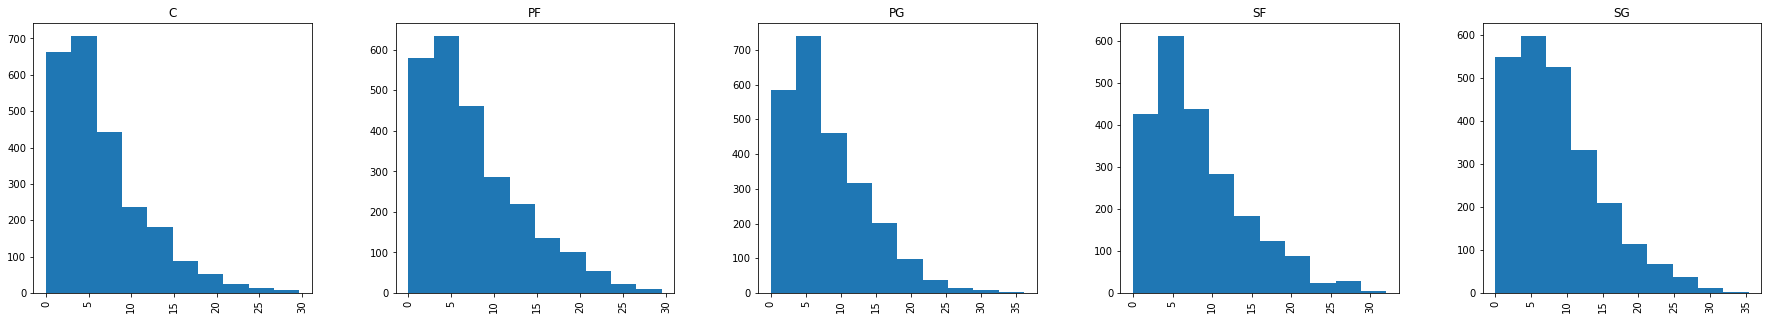

In [37]:
PTS.hist(column='PTS', by=PTS['Pos'], layout=(1, 5), figsize=(30,5))

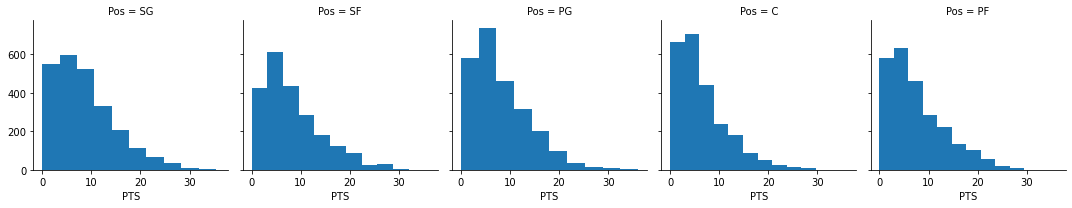

In [38]:
graph = sns.FacetGrid(PTS, col='Pos')
graph.map(plt.hist, 'PTS')

<AxesSubplot:title={'center':'PTS'}, xlabel='Pos'>

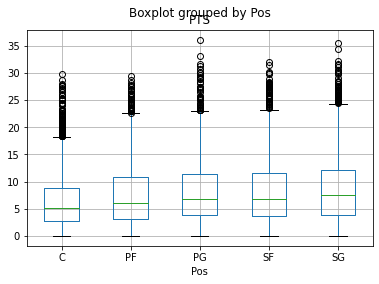

In [39]:
PTS.boxplot(column='PTS', by='Pos')

[Text(0.5, 0, 'Position'),
 Text(0, 0.5, 'Points'),
 Text(0.5, 1.0, 'Average Points scored by Position')]

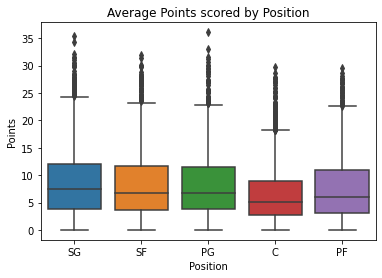

In [40]:
sns.boxplot(x='Pos', y='PTS', data=PTS).set(xlabel='Position', ylabel='Points', title='Average Points scored by Position')

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

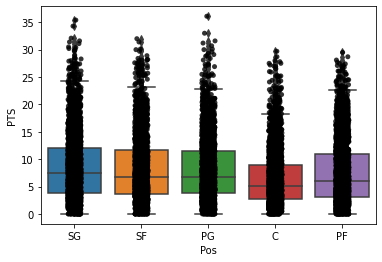

In [41]:
sns.boxplot(x='Pos', y='PTS', data=PTS)
sns.stripplot(x='Pos', y='PTS', data=PTS, jitter=True,color='black', alpha=0.8)

<AxesSubplot:>

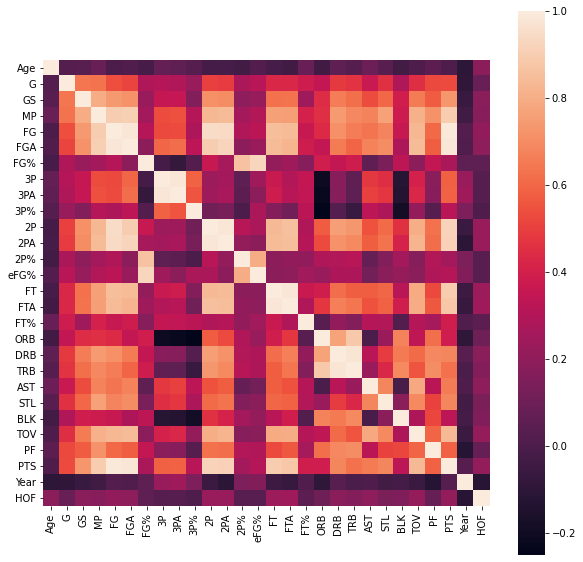

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),square=True)

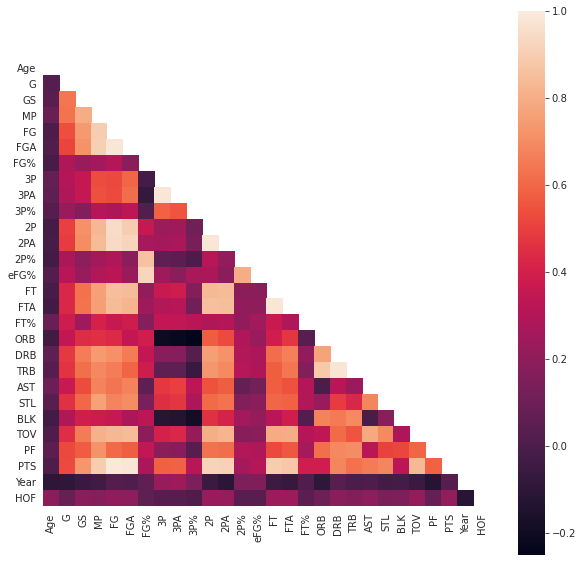

In [43]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(df.corr(), mask=mask, vmax=1, square=True)

In [44]:
nums = df.select_dtypes(include=['number'])

In [45]:
df2 = df[['Age', 'G', 'STL', 'BLK', 'PTS', 'AST', 'TOV', 'MP', 'FG%']]

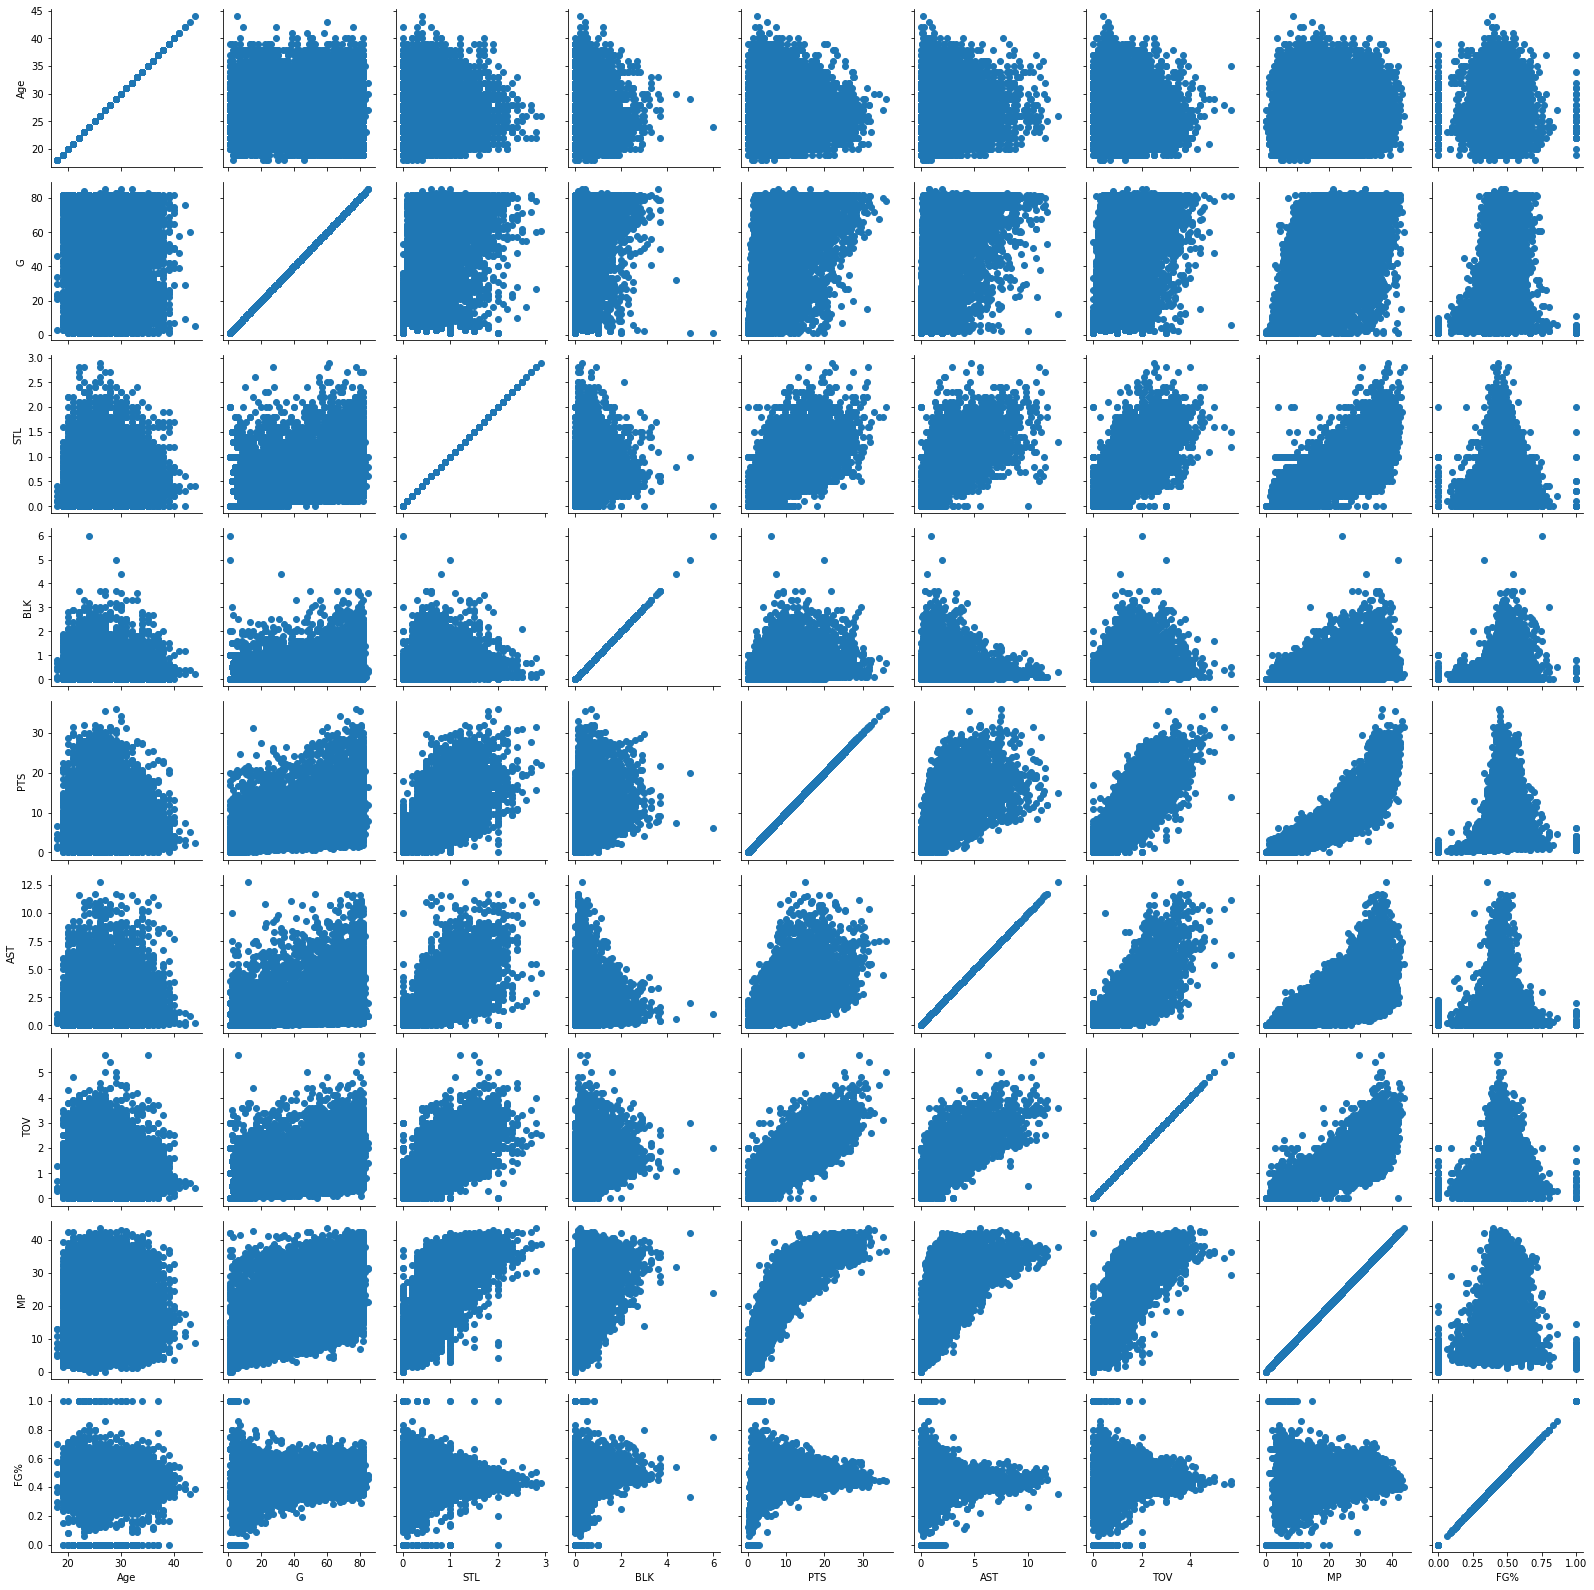

In [46]:
graph2 = sns.PairGrid(df2)
graph2.map(plt.scatter)

In [47]:
# graph3 = sns.PairGrid(nums)
# graph3.map(plt.scatter)

In [48]:
# players.loc[hof].max()

In [49]:
players[players['eFG%'] == players['eFG%'].max()]

,,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF
Player,Year,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anthony Brown,2018,25.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,False
Dajuan Wagner,2007,23.0,1.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,1.0,2.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,False
Jordan Sibert,2019,26.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,False
Naz Mitrou-Long,2018,24.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,False


In [50]:
#Question: How much does lebron james affect the average ppg for his age per season, 
#how much does his average deviate from current age
lebron = df[['PTS', 'Age']][df['Player'] == 'LeBron James']
lebron.set_index('Age', inplace=True)
lebron = lebron.squeeze()
lebron

Age
19    20.9
20    27.2
21    31.4
22    27.3
23    30.0
24    28.4
25    29.7
26    26.7
27    27.1
28    26.8
29    27.1
30    25.3
31    25.3
32    26.4
33    27.5
34    27.4
35    25.3
Name: PTS, dtype: float64

In [51]:
kobe = df[['PTS', 'Age']][df['Player'] == 'Kobe Bryant']
kobe.set_index('Age', inplace=True)
kobe = kobe.squeeze()
kobe

Age
21    22.5
22    28.5
23    25.2
24    30.0
25    24.0
26    27.6
27    35.4
28    31.6
29    28.3
30    26.8
31    27.0
32    25.3
33    27.9
34    27.3
35    13.8
36    22.3
37    17.6
Name: PTS, dtype: float64

In [52]:
#points per age
averageppa = df.groupby('Age').PTS.mean()
maxppa = df.groupby('Age').PTS.max()
averageppa1 = averageppa[averageppa.index.isin(lebron.index)]
maxppa1 = maxppa[maxppa.index.isin(lebron.index)]

In [53]:
#ppg stats per year
averageppg = df.groupby('Year').PTS.describe()
averageppg

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,496.0,7.68,5.78,0.0,3.10,6.30,10.90,29.7
2001,537.0,7.42,5.82,0.0,3.30,5.90,9.90,31.1
2002,500.0,7.87,5.88,0.0,3.40,6.40,11.10,31.4
2003,483.0,7.75,6.06,0.0,3.25,6.00,10.50,32.1
2004,585.0,7.39,5.65,0.0,3.20,5.90,10.30,28.0
2005,585.0,7.78,5.94,0.0,3.20,6.20,11.10,30.7
2006,563.0,7.65,6.15,0.0,2.90,5.80,11.00,35.4
2007,516.0,8.09,6.30,0.0,3.08,6.40,11.43,31.6
2008,595.0,7.55,5.86,0.0,3.00,6.00,10.70,30.0


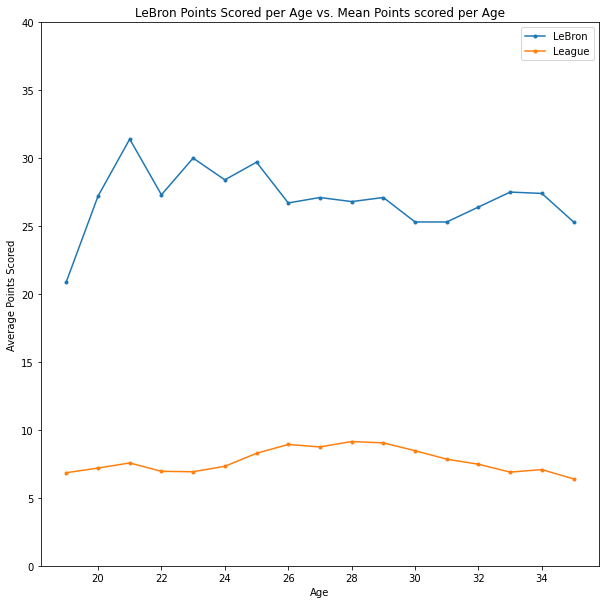

In [54]:
#LeBron ppg vs mean ppa over each season
lebron.compare(averageppa1).plot(kind='line', title='LeBron Points Scored per Age vs. Mean Points scored per Age', xlabel='Age', ylabel='Average Points Scored', ylim=(0,40), style='.-', figsize=(10,10))
plt.legend(['LeBron', 'League'])

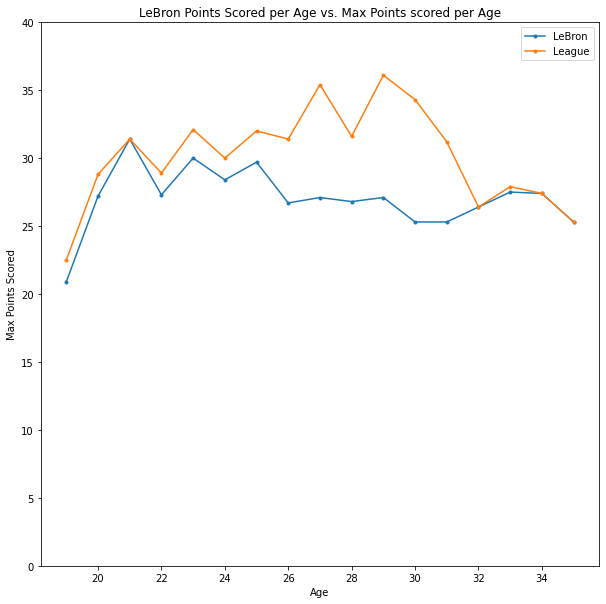

In [55]:
#compared with max ppg
lebron.compare(maxppa1, keep_shape=True, keep_equal=True).plot(kind='line', title='LeBron Points Scored per Age vs. Max Points scored per Age', xlabel='Age', ylabel='Max Points Scored',ylim=(0,40), style='.-', figsize=(10,10))
plt.legend(['LeBron', 'League'])

In [56]:
lebron - averageppa

Age
18      NaN
19    14.05
20    20.01
21    23.83
22    20.35
23    23.08
24    21.08
25    21.42
26    17.77
27    18.35
28    17.66
29    18.06
30    16.83
31    17.45
32    18.93
33    20.61
34    20.32
35    18.91
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
Name: PTS, dtype: float64

In [57]:
lebron - maxppa

Age
18    NaN
19   -1.6
20   -1.6
21    0.0
22   -1.6
23   -2.1
24   -1.6
25   -2.3
26   -4.7
27   -8.3
28   -4.8
29   -9.0
30   -9.0
31   -5.9
32    0.0
33   -0.4
34    0.0
35    0.0
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
Name: PTS, dtype: float64

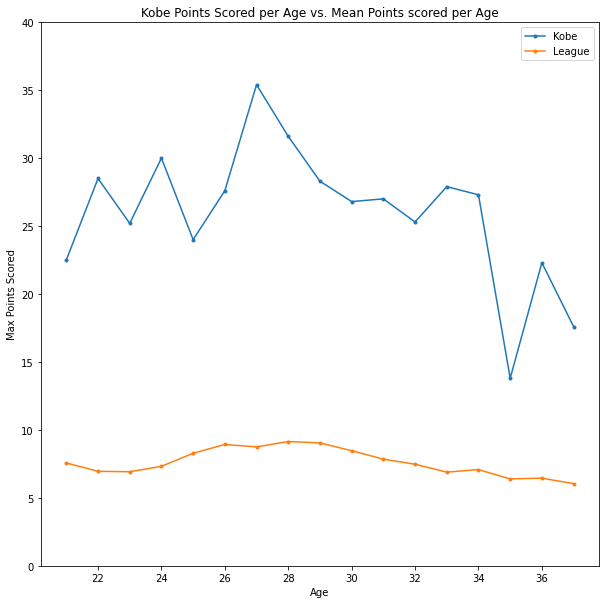

In [58]:
averageppa2 = averageppa[averageppa.index.isin(kobe.index)]
kobe.compare(averageppa2).plot(kind='line', title='Kobe Points Scored per Age vs. Mean Points scored per Age', xlabel='Age', ylabel='Max Points Scored',ylim=(0,40), style='.-', figsize=(10,10))
plt.legend(['Kobe', 'League'])

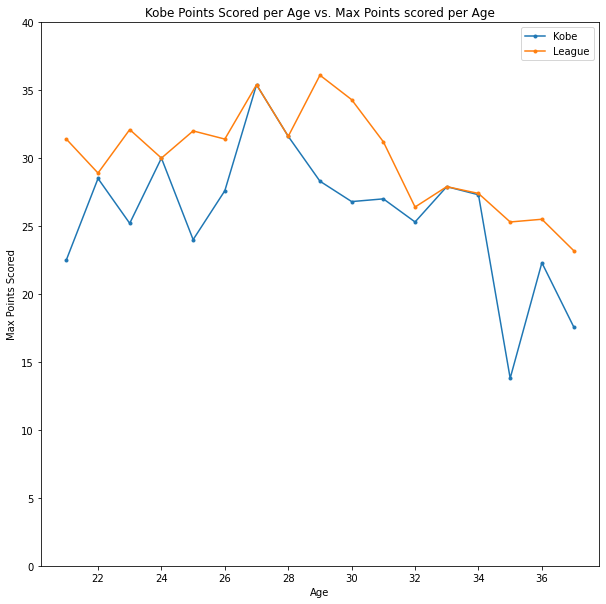

In [59]:
maxppa2 = maxppa[maxppa.index.isin(kobe.index)]
kobe.compare(maxppa2, keep_shape=True, keep_equal=True).plot(kind='line', title='Kobe Points Scored per Age vs. Max Points scored per Age', xlabel='Age', ylabel='Max Points Scored',ylim=(0,40), style='.-', figsize=(10,10))
plt.legend(['Kobe', 'League'])

In [60]:
kobe - maxppa2

Age
21    -8.9
22    -0.4
23    -6.9
24     0.0
25    -8.0
26    -3.8
27     0.0
28     0.0
29    -7.8
30    -7.5
31    -4.2
32    -1.1
33     0.0
34    -0.1
35   -11.5
36    -3.2
37    -5.6
Name: PTS, dtype: float64

In [61]:
maxppg = df.groupby('Year').PTS.max()
maxppg

Year
2000    29.7
2001    31.1
2002    31.4
2003    32.1
2004    28.0
2005    30.7
2006    35.4
2007    31.6
2008    30.0
2009    30.2
2010    30.1
2011    27.7
2012    28.0
2013    28.7
2014    32.0
2015    28.1
2016    30.1
2017    31.6
2018    30.4
2019    36.1
2020    34.3
Name: PTS, dtype: float64

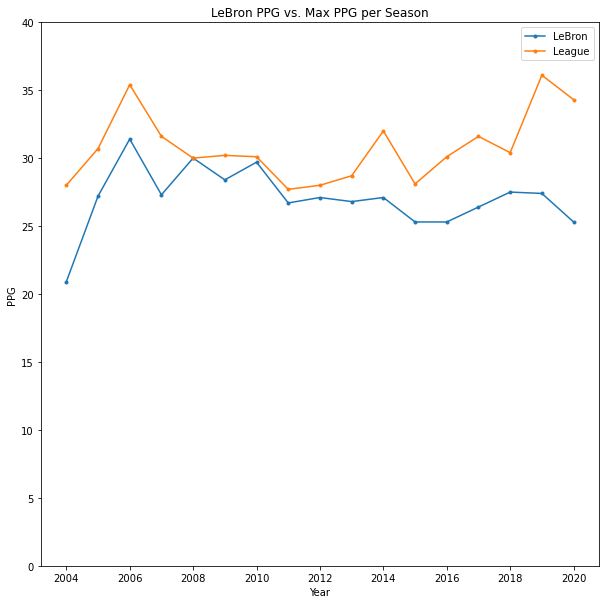

In [62]:
lebron = df[['PTS', 'Year']][df['Player'] == 'LeBron James']
lebron.set_index('Year', inplace=True)
lebron = lebron.squeeze()
window = maxppg[maxppg.index.isin(lebron.index)]
lebron.compare(window, keep_shape=True, keep_equal=True).plot(kind='line', title='LeBron PPG vs. Max PPG per Season', xlabel='Year', ylabel='PPG', ylim=(0,40), style='.-', figsize=(10,10))
plt.legend(['LeBron', 'League'])

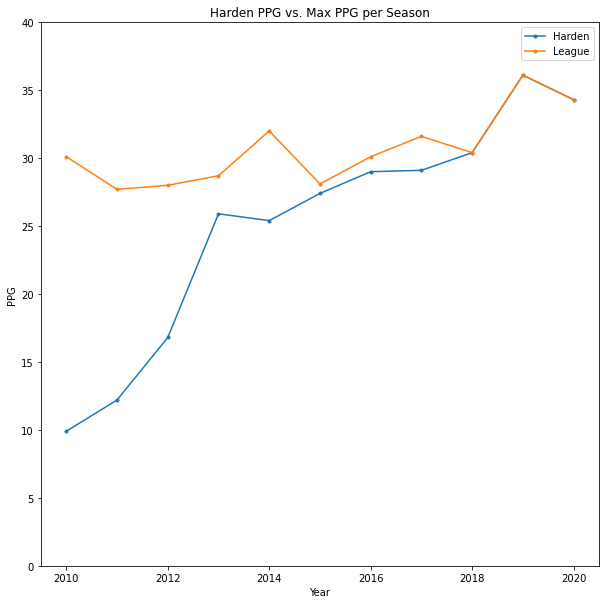

In [63]:
#comparing Harden's ppg vs max ppg over the seasons he has played in
harden = df[['PTS', 'Year']][df['Player'] == 'James Harden']
harden.set_index('Year', inplace=True)
harden = harden.squeeze()
window = maxppg[maxppg.index.isin(harden.index)]
harden.compare(window, keep_shape=True, keep_equal=True).plot(kind='line', title='Harden PPG vs. Max PPG per Season', xlabel='Year', ylabel='PPG', ylim=(0,40), style='.-', figsize=(10,10))
plt.legend(['Harden', 'League'])